# Plotting plays

In [1]:
import os

In [2]:
directions_path = ".." + os.sep + "directions"
csv_path = "." + os.sep + "csv"
corpus_path = ".." + os.sep + "RusDraCor"

## Loading play data

In [3]:
import pandas as pd
import numpy as np

In [4]:
play_df = pd.read_csv(csv_path + os.sep + "joint_data.csv", sep=";", 
                 encoding="utf-8", index_col=0)
play_df.head()

,Author,Directions,Lemmas,"Lemmas, per direction",Title,Words,"Words, per direction",Year,"Directions, per act","Words, per act","Lemmas, per act",ADJ,ADVB,INTJ,NOUN,PREP,VERB
Acts,,,,,,,,,,,,,,,,,
1,"Блок, Александр Александрович",38,910,22.263158,Балаганчик,2240,22.736842,1906,38.000000,2240.000000,910.000000,3.289474,1.315789,0.000000,7.815789,3.315789,3.368421
3,"Блок, Александр Александрович",133,1475,14.631579,Король на площади,5535,12.466165,1907,44.333333,1845.000000,491.666667,1.421053,0.872180,0.045113,4.428571,1.684211,2.090226
1,"Блок, Александр Александрович",80,1342,18.025000,Незнакомка,4222,16.462500,1907,80.000000,4222.000000,1342.000000,2.462500,0.950000,0.000000,5.450000,2.125000,2.837500
4,"Булгаков, Михаил Афанасьевич",372,2901,5.634409,Дни Турбиных,16426,3.739247,1926,93.000000,4106.500000,725.250000,0.416667,0.131720,0.018817,1.478495,0.540323,0.833333
3,"Булгаков, Михаил Афанасьевич",319,2195,6.507837,Иван Васильевич,10303,4.721003,1936,106.333333,3434.333333,731.666667,0.391850,0.156740,0.006270,2.015674,0.689655,1.068966


In [5]:
play_df = play_df.sort_values(by=["Year"])
play_df.head()

,Author,Directions,Lemmas,"Lemmas, per direction",Title,Words,"Words, per direction",Year,"Directions, per act","Words, per act","Lemmas, per act",ADJ,ADVB,INTJ,NOUN,PREP,VERB
Acts,,,,,,,,,,,,,,,,,
5,"Сумароков, Александр Петрович",33,1911,5.545455,Хорев,8440,3.515152,1747,6.6,1688.000000,382.200000,0.545455,0.090909,0.0,1.666667,0.242424,0.121212
5,"Ломоносов, Михаил Васильевич",53,2221,4.679245,Тамира и Селим,10630,2.679245,1750,10.6,2126.000000,444.200000,0.188679,0.018868,0.0,1.433962,0.226415,0.226415
5,"Сумароков, Александр Петрович",77,1907,5.467532,Семира,10363,3.493506,1751,15.4,2072.600000,381.400000,0.194805,0.025974,0.0,1.636364,0.285714,0.285714
6,"Ломоносов, Михаил Васильевич",54,1996,4.925926,Демофонт,10627,2.851852,1752,9.0,1771.166667,332.666667,0.148148,0.037037,0.0,1.462963,0.296296,0.203704
5,"Сумароков, Александр Петрович",57,1913,5.824561,Димитрий Самозванец,7278,3.684211,1771,11.4,1455.600000,382.600000,0.473684,0.052632,0.0,1.859649,0.245614,0.245614


## Plots

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

### Distributions

#### By author

In [7]:
authors = play_df["Author"].value_counts()
authors = authors.sort_index()

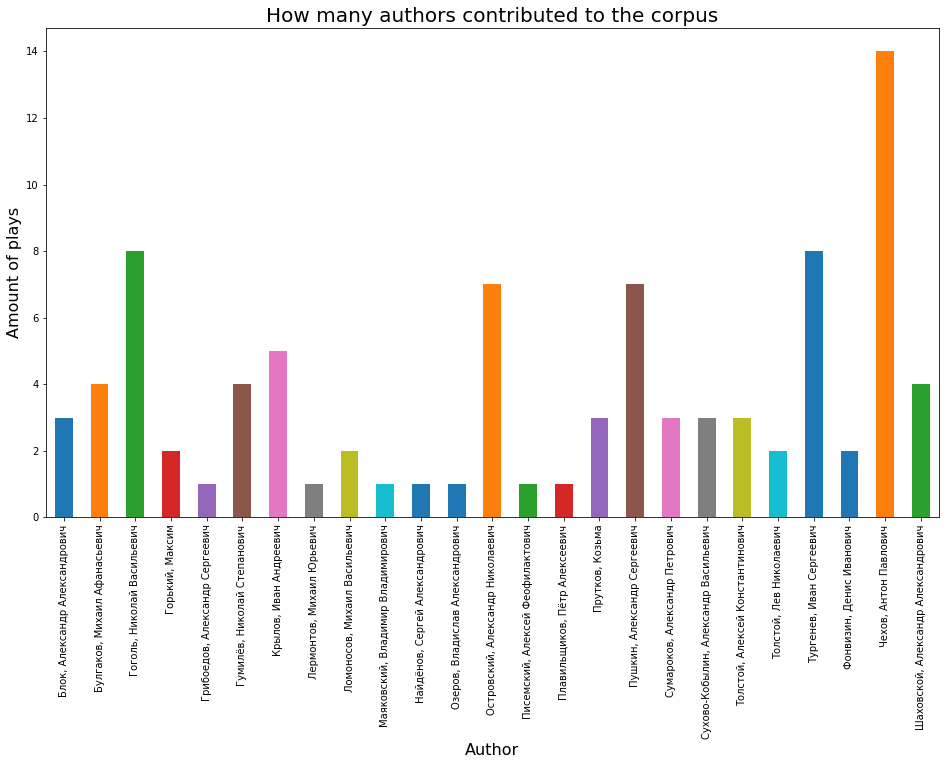

In [8]:
plt.figure(figsize=(16,9))
plt.title("How many authors contributed to the corpus", fontsize=20)
plt.xlabel("Author", fontsize=16)
plt.xticks(rotation=-90)
plt.ylabel("Amount of plays", fontsize=16)

authors.plot(kind="bar")
plt.show()

#### By average lemmas per direction

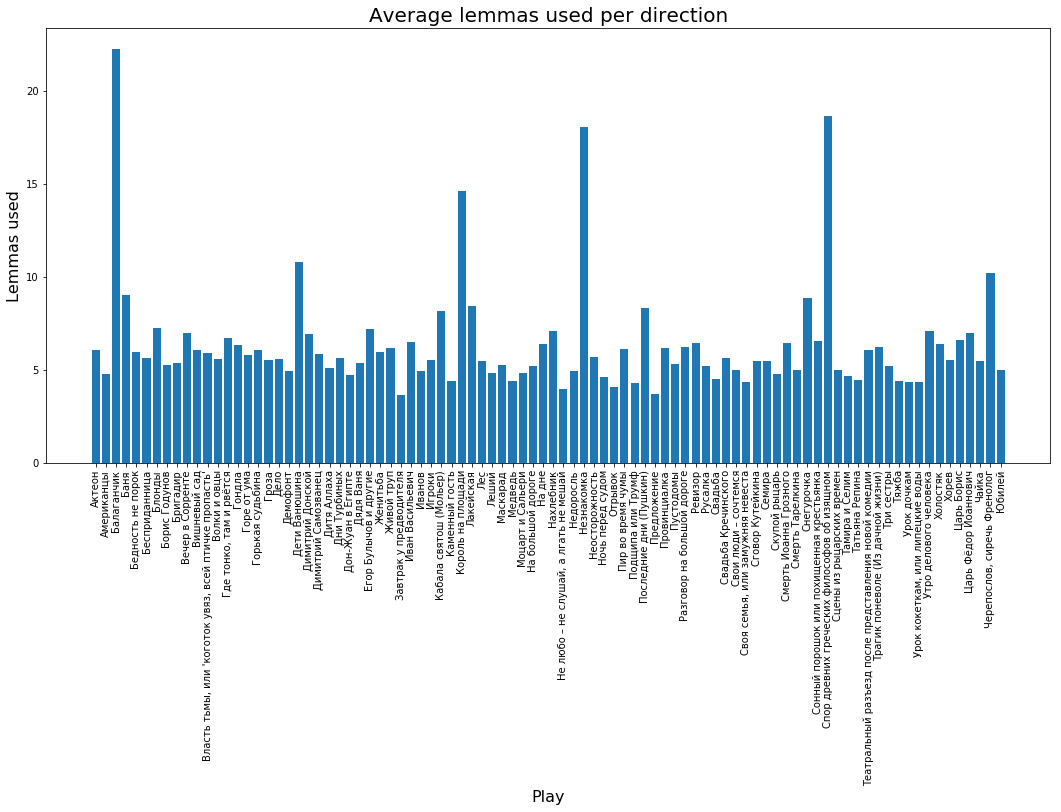

In [9]:
plt.figure(figsize=(18,8))
plt.title("Average lemmas used per direction", fontsize=20)
plt.xlabel("Play", fontsize=16)
plt.ylabel("Lemmas used", fontsize=16)
plt.xticks(rotation=90)

plt.bar(play_df["Title"], play_df["Lemmas, per direction"])
plt.show()

## Parts-of-speech

### Subfunctions

#### Plotting

I'll make a separate function to plot everything so I won't have to copy and paste:

In [10]:
def plot_features(x_col, y_col, axis):
    # data
    x = pd.to_numeric(x_col)
    y = pd.to_numeric(y_col)
    
    # plot
    plt.figure(figsize=(18,8))
    plt.title(axis["title"], fontsize=20)
    plt.xlabel(axis["x"], fontsize=16)
    plt.ylabel(axis["y"], fontsize=16)
    plt.xticks(rotation=90)
    plt.plot(x, y, '.')
    
    # linear regression to show the trend
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b, '-')
    plt.show()

#### Regression

I'll use that to show the trend and compare these trends between different POS.

In [11]:
def regression(x_col, y_col):
    x = pd.to_numeric(x_col)
    y = pd.to_numeric(y_col)
    m, b = np.polyfit(x, y, 1)
    return m, b

### Average usage of parts-of-speech throughout the time

#### Adjectives

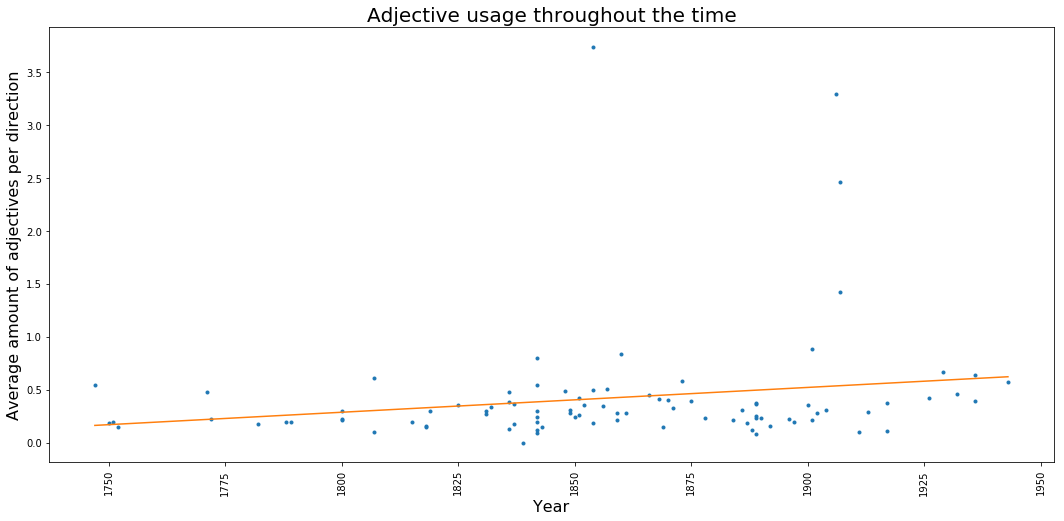

In [12]:
axis = {
    "title": "Adjective usage throughout the time",
    "x": "Year",
    "y": "Average amount of adjectives per direction"
}
plot_features(play_df["Year"], play_df["ADJ"], axis)

In [13]:
regression(play_df["Year"], play_df["ADJ"])

(0.0023441355724270817, -3.9334376503563995)

#### Adverbs

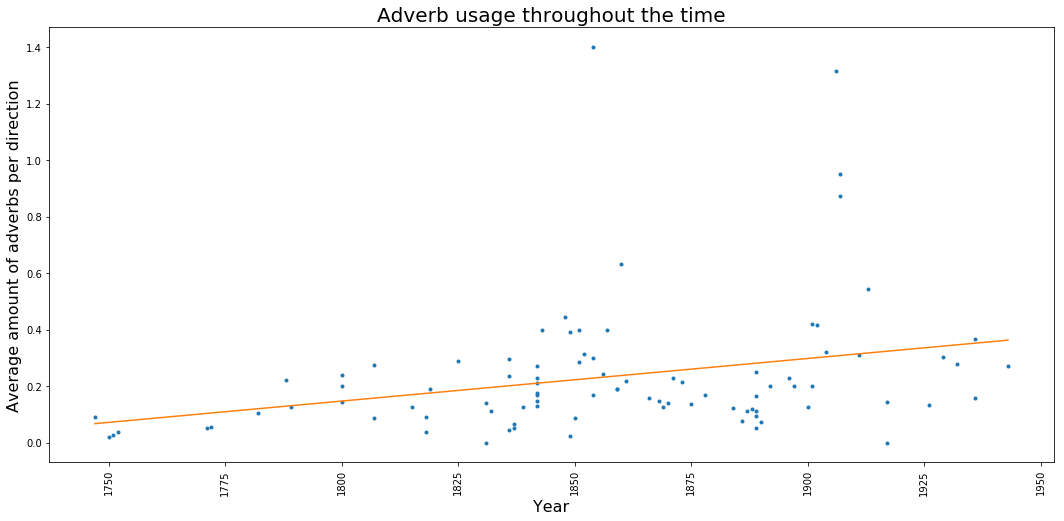

In [14]:
axis = {
    "title": "Adverb usage throughout the time",
    "x": "Year",
    "y": "Average amount of adverbs per direction"
}
plot_features(play_df["Year"], play_df["ADVB"], axis)

In [15]:
regression(play_df["Year"], play_df["ADVB"])

(0.001507921178563608, -2.5674246014545834)

#### Interjections

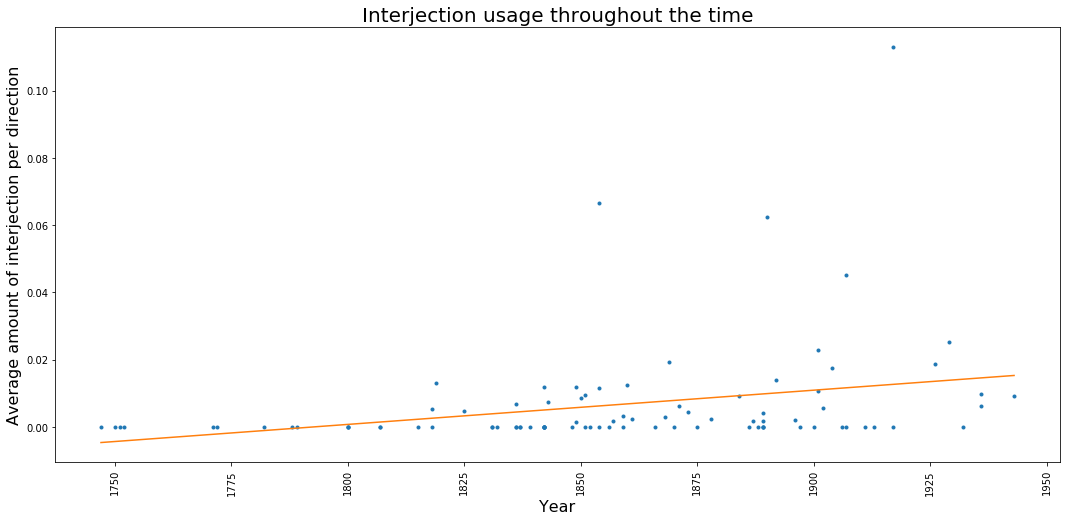

In [16]:
axis = {
    "title": "Interjection usage throughout the time",
    "x": "Year",
    "y": "Average amount of interjection per direction"
}
plot_features(play_df["Year"], play_df["INTJ"], axis)

In [17]:
regression(play_df["Year"], play_df["INTJ"])

(0.00010171788054979558, -0.18233022778085017)

#### Verbs

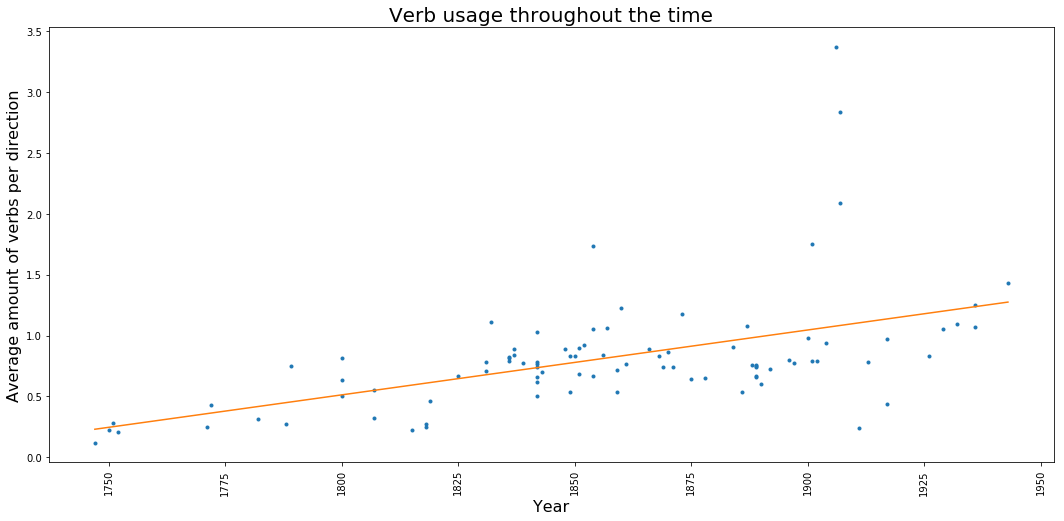

In [18]:
axis = {
    "title": "Verb usage throughout the time",
    "x": "Year",
    "y": "Average amount of verbs per direction"
}
plot_features(play_df["Year"], play_df["VERB"], axis)

In [19]:
regression(play_df["Year"], play_df["VERB"])

(0.005328234553071075, -9.078053925646236)

#### Nouns

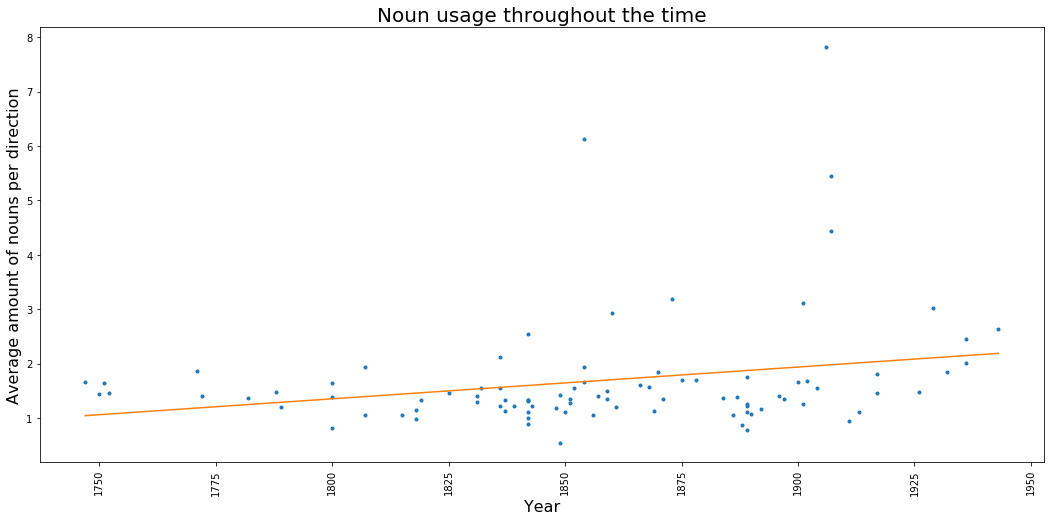

In [20]:
axis = {
    "title": "Noun usage throughout the time",
    "x": "Year",
    "y": "Average amount of nouns per direction"
}
plot_features(play_df["Year"], play_df["NOUN"], axis)

In [21]:
regression(play_df["Year"], play_df["NOUN"])

(0.005843188336131767, -9.166356115767165)

#### Prepositions

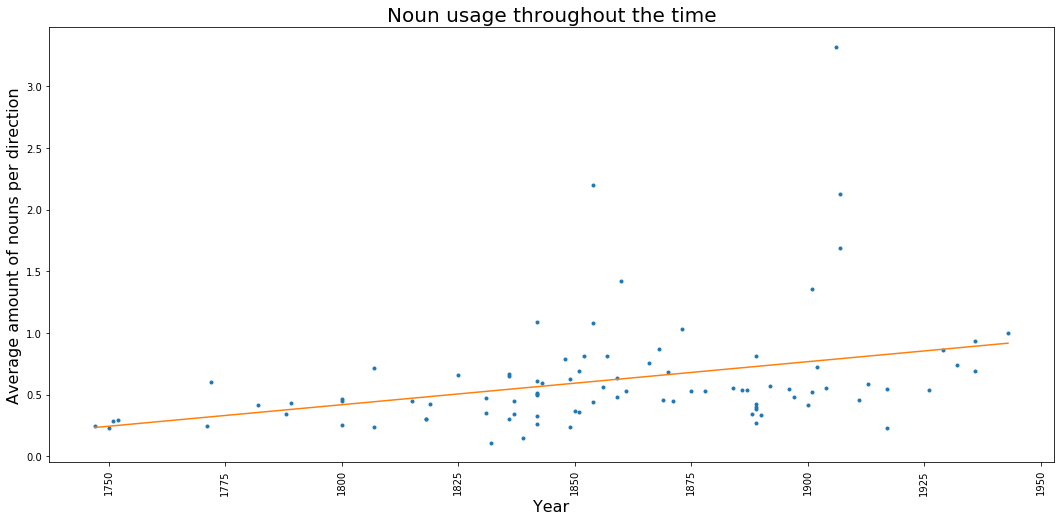

In [22]:
axis = {
    "title": "Noun usage throughout the time",
    "x": "Year",
    "y": "Average amount of nouns per direction"
}
plot_features(play_df["Year"], play_df["PREP"], axis)

In [23]:
regression(play_df["Year"], play_df["PREP"])

(0.0034871807778723207, -5.8592378443270325)